In [3]:
import numpy as np
from urllib.request import urlopen
from scipy import stats

import urllib
import matplotlib.pyplot as plt # Visuals
import seaborn as sns 
import sklearn as skl
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from sklearn.tree import export_graphviz # Extract Decision Tree visual
from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import metrics
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # AUC 
from sklearn.model_selection import KFold, cross_val_score #cross validation 
from sklearn import cross_validation  #cross validation 
from urllib.request import urlopen # Get data from UCI Machine Learning Repository
import plotly.graph_objs as go
import plotly.plotly as py
def normalization(disease):
    dfnorm=disease.copy()
    for i in disease.columns:
        maxv=disease[i].max();
        minv=disease[i].min();
        dfnorm[i]=(disease[i]-np.mean(disease[i]))/(maxv-minv);
    return dfnorm

/Users/manaswini/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/manaswini/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [5]:
'''starting of preprocessing process'''
dataset.replace('?',np.nan,inplace=True)
dataset=dataset.astype('float32')

In [6]:
'''filling these null values with previous day data'''
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]


In [7]:
fill_missing(dataset.values);

In [8]:
print(dataset.values)

[[   4.21600008    0.41800001  234.83999634 ...,    0.            1.           17.        ]
 [   5.36000013    0.43599999  233.63000488 ...,    0.            1.           16.        ]
 [   5.37400007    0.498       233.28999329 ...,    0.            2.           17.        ]
 ..., 
 [   0.93800002    0.          239.82000732 ...,    0.            0.            0.        ]
 [   0.93400002    0.          239.69999695 ...,    0.            0.            0.        ]
 [   0.93199998    0.          239.55000305 ...,    0.            0.            0.        ]]


In [9]:
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
dataset.to_csv('household_power_consumption.csv')

In [10]:
dataset.plot(kind='box',return_type='axes',color='green',sym='r*')
    

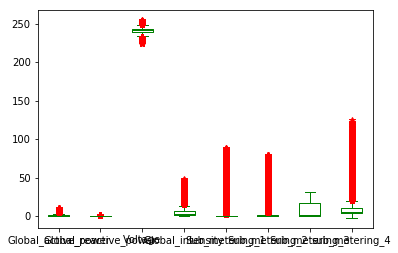

In [11]:
plt.show()


In [12]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Global_active_power       1.218000
Global_reactive_power     0.146000
Voltage                   3.879990
Global_intensity          5.000000
Sub_metering_1            0.000000
Sub_metering_2            1.000000
Sub_metering_3           17.000000
sub_metering_4            6.566667
dtype: float64


(1901113, 8)
(1601479, 8)


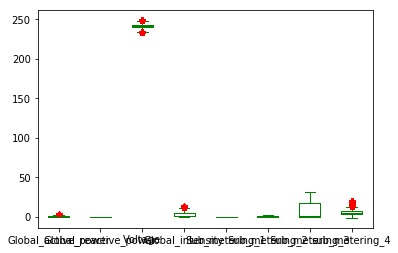

(1601479, 8)


In [13]:
z = np.abs(stats.zscore(dataset))
dataset = dataset[(z < 3).all(axis=1)]
print(dataset.shape)
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset.shape)
dataset.plot(kind='box',return_type='axes',color='green',sym='r*')
plt.show()
print(dataset.shape)


In [14]:
print(dataset.head)
dfnorm=normalization(dataset);
dfnorm.plot(kind='box',return_type='axes',color='green',sym='r*')

<bound method NDFrame.head of                      Global_active_power  Global_reactive_power     Voltage  \
datetime                                                                      
2006-12-16 18:40:00                2.264                  0.054  234.669998   
2006-12-16 18:41:00                2.270                  0.054  235.270004   
2006-12-16 18:42:00                2.258                  0.054  235.119995   
2006-12-16 18:43:00                2.188                  0.068  235.800003   
2006-12-16 20:55:00                1.832                  0.170  237.539993   
2006-12-16 20:56:00                2.044                  0.102  237.440002   
2006-12-16 21:02:00                1.692                  0.054  238.720001   
2006-12-16 21:08:00                2.188                  0.060  237.740005   
2006-12-16 21:13:00                1.766                  0.058  237.699997   
2006-12-16 21:18:00                1.876                  0.074  238.630005   
2006-12-16 21:27:00   

/Users/manaswini/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning:

Invalid value encountered in percentile



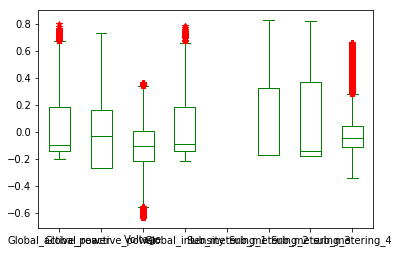

In [15]:
plt.show()

In [16]:
corr_mat=dataset.corr()
print(corr_mat)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.134865 -0.214683   
Global_reactive_power             0.134865               1.000000 -0.049150   
Voltage                          -0.214683              -0.049150  1.000000   
Global_intensity                  0.997811               0.169384 -0.229000   
Sub_metering_1                         NaN                    NaN       NaN   
Sub_metering_2                    0.042593               0.443000 -0.034256   
Sub_metering_3                    0.919640               0.034934 -0.218789   
sub_metering_4                    0.554120               0.192824 -0.069373   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.997811             NaN        0.042593   
Global_reactive_power          0.169384             NaN        0.443000   
Voltage                       -0.229000             NaN       -

In [202]:


data = pd.read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = data[1:-328], data[-328:-6]
print(train.shape)
print(test.shape)
# restructure into windows of weekly data
#train = np.array(np.split(train, len(train)/7))
#test = np.array(np.split(test, len(test)/7))

X_train = train.drop(['Global_active_power'],axis=1)
Y_train = train['Global_active_power']
print(X_train.shape)
print(Y_train.shape)


X_test = test.drop(['Global_active_power'],axis=1)
Y_test = test['Global_active_power']


print(X_test.shape)
print(Y_test.shape)

(1113, 8)
(322, 8)
(1113, 7)
(1113,)
(322, 7)
(322,)


In [97]:
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = np.array(np.split(train, len(train)/7))
	test = np.array(np.split(test, len(test)/7))
	return train, test

(1442, 8)
(1442, 8)
(1113, 8)
(322, 8)


In [82]:

dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  Global_reactive_power        Voltage  \
datetime                                                                
2006-12-16          1209.175999                 34.922   93552.529953   
2006-12-17          3390.460002                226.006  345725.320053   
2006-12-18          2203.826000                161.792  347373.640137   
2006-12-19          1666.194001                150.942  348479.009842   
2006-12-20          2225.748000                160.998  348923.610077   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16       5180.800003             0.0           546.0          4926.0   
2006-12-17      14398.600012          2033.0          4187.0         13341.0   
2006-12-18       9247.199997          1063.0          2621.0         14018.0   
2006-12-19       7094.000005           839.0          7602.0          6197.0  

In [206]:
dataset = pd.read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)
#validate train data
print(train.shape)

print(train[0, 0,0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])


(159, 7, 8)
3390.46000189 1309.26800087
(46, 7, 8)
2083.45399883 2197.00599793


In [207]:
def to_series(data):
	# extract just the total power from each week
	series = [week[:, 0] for week in data]
	# flatten into a single series
	series =np.array(series).flatten()
	return series

In [208]:
def to_supervised(history, n_input):
	# convert history to a univariate series
	data = to_series(history)
	X, y = list(), list()
	ix_start = 0
	# step over the entire history one time step at a time
	for i in range(len(data)):
		# define the end of the input sequence
		ix_end = ix_start + n_input
		# ensure we have enough data for this instance
		if ix_end < len(data):
			X.append(data[ix_start:ix_end])
			y.append(data[ix_end])
		# move along one time step
		ix_start += 1
	return np.array(X), np.array(y)

In [209]:
def forecast(model, input_x, n_input):
	yhat_sequence = list()
	input_data = [x for x in input_x]
	for j in range(7):
		# prepare the input data
		X = np.array(input_data[-n_input:]).reshape(1, n_input)
		# make a one-step forecast
		yhat = model.predict(X)[0]
		# add to the result
		yhat_sequence.append(yhat)
		# add the prediction to the input
		input_data.append(yhat)
	return yhat_sequence


In [210]:
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [211]:
def evaluate_model(model, train, test, n_input):
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = sklearn_predict(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	predictions = np.array(predictions)
	# evaluate predictions days for each week
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

In [212]:
def sklearn_predict(model, history, n_input):
	# prepare data
	train_x, train_y = to_supervised(history, n_input)
	# make pipeline
	pipeline = make_pipeline(model)
	# fit the model
	pipeline.fit(train_x, train_y)
	# predict the week, recursively
	yhat_sequence = forecast(pipeline, train_x[-1, :], n_input)
	return yhat_sequence

In [213]:
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

In [214]:
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

lr: [388.388] 411.0, 389.1, 338.0, 370.8, 408.5, 308.3, 471.1


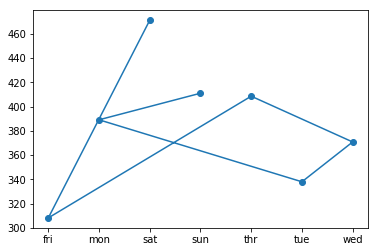

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']

score, scores = evaluate_model(LinearRegression(), train, test, 7)
# summarize scores
summarize_scores("lr", score, scores)
# plot scores
pyplot.plot(days, scores, marker='o', label="linear")
pyplot.show()
